In [1]:
# from coffea.nanoevents import TreeMakerSchema, BaseSchema, NanoEventsFactory
from fit_functions import fit_unbinned_double_gauss_J, fit_unbinned_gauss_J_with_background
import matplotlib.pyplot as plt
import uproot as up
import numpy as np
import pandas as pd
import awkward as ak
import mplhep as hep
hep.style.use(hep.style.CMS)
import ROOT

Welcome to JupyROOT 6.26/10


In [2]:
# dataset = '../outputs/2022MC_ZmmJpsimm_AllCandidates.root'
dataset = 'temp.root'
file = up.open(dataset)

In [3]:
events = file['ntuple;1']
columns = ['Event', 'B_Ups1_mass', 'B_Ups2_mass', 'FourL_mass', 'FourL_VtxProb', 'B_Ups1_Eta', 'B_Ups2_Eta']
branches = events.arrays(columns)

In [4]:
def print_summary(data, text):
    events = len(data)
    candidates = np.sum(ak.num(branches['FourL_mass'], axis=1))

    print(f"Number of candidates {text}: {candidates}")
    print(f"Number of events {text}: {events}")

In [5]:
print_summary(branches, 'Preselection')

Number of candidates Preselection: 356
Number of events Preselection: 1


In [6]:
# convert to pandas dataframe
data_dict = {key: ak.to_list(branches[key][0]) for key in branches.fields}
df_candi = pd.DataFrame(data_dict)

In [7]:
df_candi

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb,B_Ups1_Eta,B_Ups2_Eta
0,1.175958e+09,3.028934,75.089546,131.633469,0.939568,-2.321969,-1.852812
1,8.637258e+08,3.108999,87.825439,116.920921,0.911033,1.752550,0.939309
2,2.547367e+09,3.055453,104.605804,155.078323,0.072703,-1.749975,3.329519
3,2.300706e+07,3.141289,84.942101,130.473404,0.260900,0.438918,1.739018
4,1.229868e+08,3.156949,89.479218,122.497864,0.411882,1.127802,1.189018
...,...,...,...,...,...,...,...
351,6.337103e+08,3.110590,91.221916,139.062332,0.198718,-0.014456,2.665664
352,1.016026e+09,3.040296,77.060989,139.823196,0.030604,0.000000,0.000000
353,1.072055e+09,3.065016,73.639694,140.865616,0.458070,-0.757540,2.309372
354,6.064940e+07,3.070050,88.396515,112.240219,0.970714,-0.406424,3.980753


In [8]:
df_candi[df_candi.duplicated(subset='Event', keep=False)].sort_values('Event', ascending=False)

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb,B_Ups1_Eta,B_Ups2_Eta
37,3.087949e+09,3.056620,88.885437,153.341949,0.295599,-1.764969,0.213296
38,3.087949e+09,3.056620,72.275276,141.107925,0.887442,0.000000,0.000000
17,2.359780e+09,3.101670,76.556541,142.552170,0.820035,1.278311,-0.306173
18,2.359780e+09,3.101670,81.211975,133.671661,0.666606,1.278311,-0.020811
90,1.735437e+09,3.133837,95.784821,154.821411,0.505091,0.000000,0.000000
91,1.735437e+09,3.133837,80.211357,145.699005,0.564649,0.000000,0.000000
271,1.022169e+09,3.146639,93.195137,140.681473,0.970810,0.000000,0.000000
272,1.022169e+09,3.146639,93.103928,153.036835,0.557381,0.000000,0.000000
237,8.574708e+08,3.145550,100.075638,149.597427,0.490314,0.765013,-1.608121
238,8.574708e+08,3.145550,93.364807,145.302063,0.527101,0.000000,0.000000


In [9]:
# for duplicated events, keep the one with the highest FourL_VtxProb
df_events = df_candi.sort_values('FourL_VtxProb', ascending=False).drop_duplicates('Event').sort_index()

In [10]:
df_events

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb,B_Ups1_Eta,B_Ups2_Eta
0,1.175958e+09,3.028934,75.089546,131.633469,0.939568,-2.321969,-1.852812
1,8.637258e+08,3.108999,87.825439,116.920921,0.911033,1.752550,0.939309
2,2.547367e+09,3.055453,104.605804,155.078323,0.072703,-1.749975,3.329519
3,2.300706e+07,3.141289,84.942101,130.473404,0.260900,0.438918,1.739018
4,1.229868e+08,3.156949,89.479218,122.497864,0.411882,1.127802,1.189018
...,...,...,...,...,...,...,...
351,6.337103e+08,3.110590,91.221916,139.062332,0.198718,-0.014456,2.665664
352,1.016026e+09,3.040296,77.060989,139.823196,0.030604,0.000000,0.000000
353,1.072055e+09,3.065016,73.639694,140.865616,0.458070,-0.757540,2.309372
354,6.064940e+07,3.070050,88.396515,112.240219,0.970714,-0.406424,3.980753


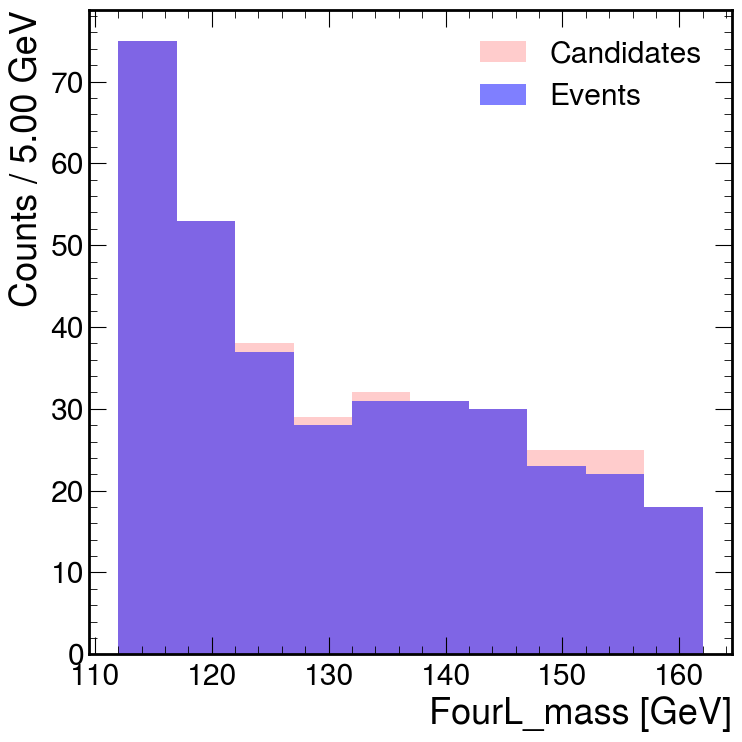

In [19]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 10, 112, 162
# plt.hist(ak.flatten(branches['FourL_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['FourL_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['FourL_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("FourL_mass [GeV]")
plt.legend()
plt.tight_layout()

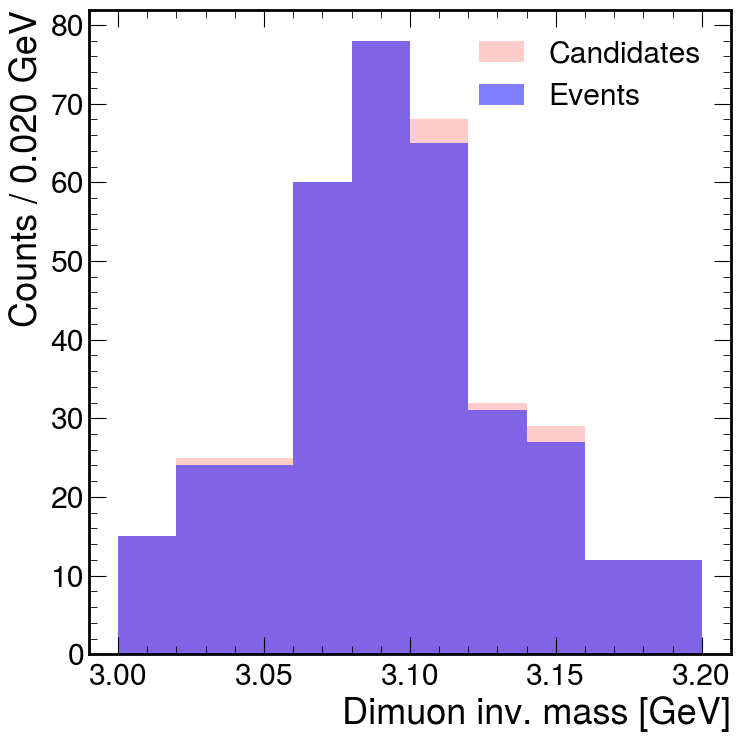

In [12]:
plt.figure(figsize=(8, 8))
# nbins, xlow, xhigh = 7, 9, 9.7
nbins, xlow, xhigh = 10, 3.0, 3.2
# plt.hist(ak.flatten(branches['B_Ups1_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['B_Ups1_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['B_Ups1_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.3f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.legend()
plt.tight_layout()

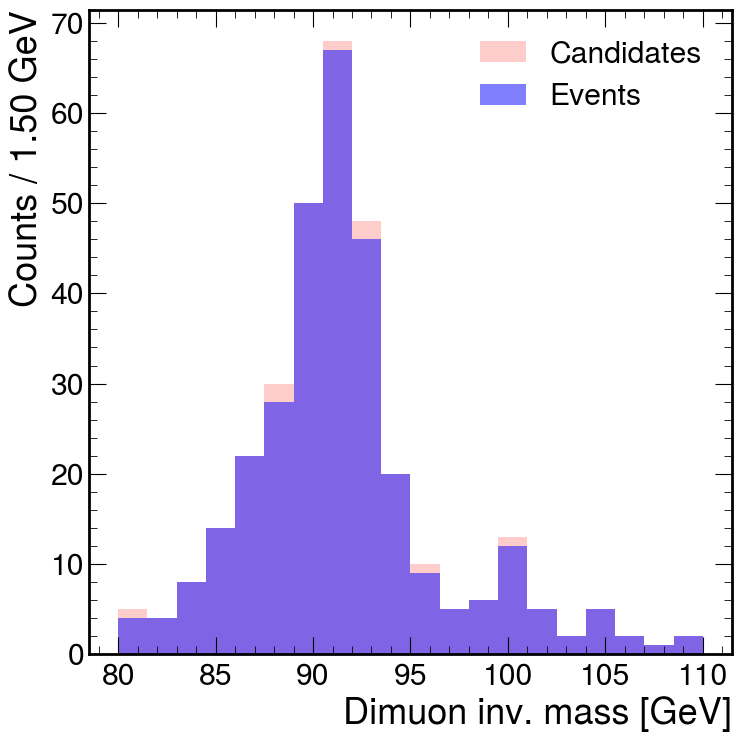

In [23]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 20, 80, 110
# plt.hist(ak.flatten(branches['B_Ups2_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['B_Ups2_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['B_Ups2_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.legend()
plt.tight_layout()

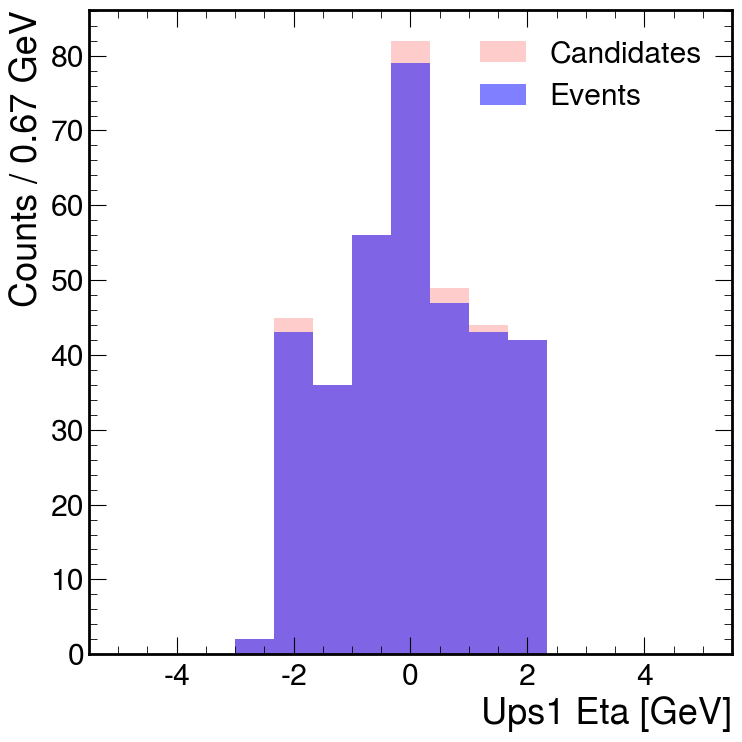

In [14]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 15, -5, 5
# plt.hist(ak.flatten(branches['B_Ups2_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['B_Ups1_Eta'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['B_Ups1_Eta'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Ups1 Eta [GeV]")
plt.legend()
plt.tight_layout()

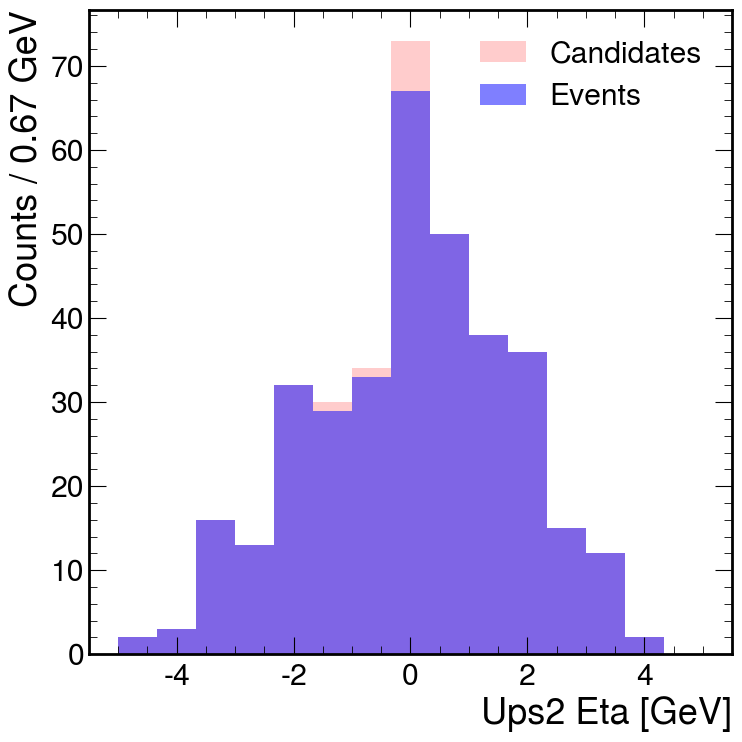

In [15]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 15, -5, 5
# plt.hist(ak.flatten(branches['B_Ups2_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['B_Ups2_Eta'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['B_Ups2_Eta'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Ups2 Eta [GeV]")
plt.legend()
plt.tight_layout()

In [16]:
nbins, xlow, xhigh = 8, 3.0, 3.2
B_J_mass_candidates = df_events['B_Ups1_mass'].to_numpy()
mass = ROOT.RooRealVar("B_J_mass", "DiMuon mass", xlow, xhigh, "GeV")
data = ROOT.RooDataSet.from_numpy({'B_J_mass': B_J_mass_candidates}, [mass])

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gaussian1,gaussian2)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 f_sig1       5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 mean1        3.10000e+00  1.10000e-01    2.50000e+00  3.60000e+00
     3 sigma1       1.00000e-02  4.50000e-03    1.00000e-03  1.00000e-01
     4 sigma2       1.00000e-02  4.50000e-03    1.00000e-03  1.00000e-01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        2000           1
 **********
 FIRST CALL TO 

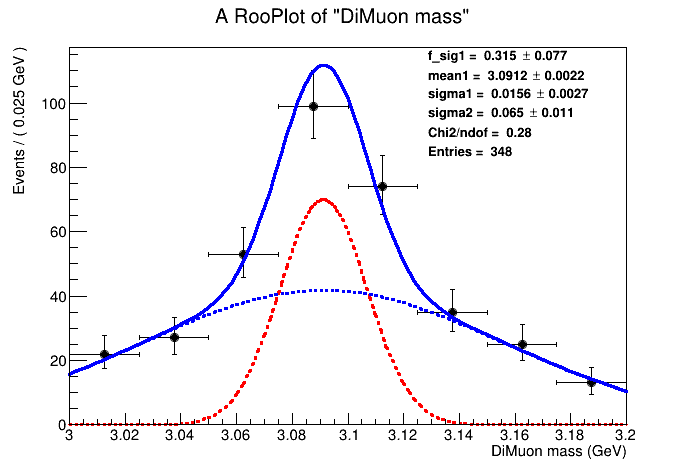

In [17]:
frame = fit_unbinned_double_gauss_J(data, mass, nbins)

# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Z Candidates")
frame.Draw()
canvas.Draw()